In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [18]:

# Function to load and convert image to matrix
def image_to_matrix(image_path):
    # Open the image
    img = Image.open(image_path)
    
    # Resize the image to 512x512
    img_resized = img.resize((512, 512))
    
    # Convert image to grayscale
    img_gray = img_resized.convert('L')
    
    # Convert image to numpy array
    img_array = np.array(img_gray)
    
    return img_array

In [19]:
# Image paths
image_paths = ['band1.gif', 'band2.gif', 'band3.gif', 'band4.gif']

# Initialize list to store original matrices
original_matrices = []

# Convert each image to matrix and print
print("Original 512x512 Matrices:")
for path in image_paths:
    matrix = image_to_matrix(path)
    original_matrices.append(matrix)
    print(matrix)
    print()

Original 512x512 Matrices:
[[41 41 38 ... 41 41 41]
 [41 42 41 ... 44 41 41]
 [41 43 39 ... 42 40 40]
 ...
 [39 38 38 ... 38 39 37]
 [40 39 40 ... 38 39 37]
 [41 42 42 ... 38 38 37]]

[[27 27 25 ... 27 28 28]
 [26 27 27 ... 30 28 28]
 [26 27 26 ... 28 27 28]
 ...
 [25 24 23 ... 22 23 23]
 [25 24 25 ... 23 23 22]
 [26 27 28 ... 22 23 22]]

[[26 29 26 ... 27 27 28]
 [26 27 28 ... 30 32 28]
 [26 26 27 ... 31 32 28]
 ...
 [23 23 21 ... 20 19 21]
 [24 25 24 ... 20 19 21]
 [25 29 29 ... 20 19 20]]

[[42 41 40 ... 32 33 33]
 [43 43 42 ... 33 33 33]
 [43 43 41 ... 35 33 33]
 ...
 [33 31 33 ... 22 27 24]
 [37 33 35 ... 23 31 22]
 [39 38 38 ... 25 31 22]]



In [20]:
# Flatten each matrix and print
print("Flattened 512^2x1 Matrices:")
for matrix in original_matrices:
    flattened_matrix = matrix.flatten()
    print(flattened_matrix)


Flattened 512^2x1 Matrices:
[41 41 38 ... 38 38 37]
[27 27 25 ... 22 23 22]
[26 29 26 ... 20 19 20]
[42 41 40 ... 25 31 22]


In [21]:
# Concatenate the flattened matrices horizontally
concatenated_matrix = np.hstack([matrix.flatten()[:, np.newaxis] for matrix in original_matrices])

# Print the shape of the concatenated matrix
print(concatenated_matrix)
print("Shape of the concatenated matrix:", concatenated_matrix.shape)


[[41 27 26 42]
 [41 27 29 41]
 [38 25 26 40]
 ...
 [38 22 20 25]
 [38 23 19 31]
 [37 22 20 22]]
Shape of the concatenated matrix: (262144, 4)


In [22]:

class KMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def fit(self, X):
        # Randomly initialize centroids
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            # Assign each data point to the nearest centroid
            labels = self._assign_labels(X)
            
            # Update centroids based on the mean of data points in each cluster
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
            
            # Check if centroids have converged
            if np.allclose(self.centroids, new_centroids):
                break
            
            self.centroids = new_centroids
        
        # Assign final labels
        self.labels_ = self._assign_labels(X)
    
    def _assign_labels(self, X):
        # Calculate distances from each data point to each centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        
        # Assign labels based on the nearest centroid
        labels = np.argmin(distances, axis=1)
        
        return labels

# Define list of k values
k_values = [2, 3, 4, 5, 6]

# Create an empty dictionary to store cluster labels for each k value
cluster_labels = {}

# Assuming concatenated_matrix is your data matrix
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(concatenated_matrix)
    cluster_labels[k] = kmeans.labels_

# Print cluster labels for each k value
for k, labels in cluster_labels.items():
    print(f"Cluster labels for k={k}: {labels}")


Cluster labels for k=2: [1 1 1 ... 0 0 0]
Cluster labels for k=3: [0 0 1 ... 2 1 2]
Cluster labels for k=4: [0 0 0 ... 1 3 1]
Cluster labels for k=5: [2 4 2 ... 3 3 3]
Cluster labels for k=6: [0 4 0 ... 1 3 1]


In [23]:

reshaped_labels = {}

# Reshape each label matrix to (512, 512)
for k, labels in cluster_labels.items():
    reshaped_labels[k] = labels.reshape(512, 512)

# Print the reshaped label matrices
for k, labels in reshaped_labels.items():
    print(f"Reshaped labels for k={k}:")
    print(labels)
    print()


Reshaped labels for k=2:
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]]

Reshaped labels for k=3:
[[0 0 1 ... 2 1 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 2 1]
 ...
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 1 2]
 [1 0 0 ... 2 1 2]]

Reshaped labels for k=4:
[[0 0 0 ... 3 3 3]
 [0 0 0 ... 2 2 3]
 [0 0 0 ... 2 2 3]
 ...
 [3 3 3 ... 1 3 1]
 [3 3 3 ... 1 3 1]
 [0 2 2 ... 1 3 1]]

Reshaped labels for k=5:
[[2 4 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 4 1 1]
 ...
 [2 3 3 ... 3 3 3]
 [2 1 2 ... 3 3 3]
 [2 4 4 ... 3 3 3]]

Reshaped labels for k=6:
[[0 4 0 ... 5 5 5]
 [0 0 0 ... 5 5 5]
 [0 0 0 ... 4 5 5]
 ...
 [3 3 3 ... 1 3 1]
 [4 3 3 ... 1 3 1]
 [4 4 4 ... 1 3 1]]



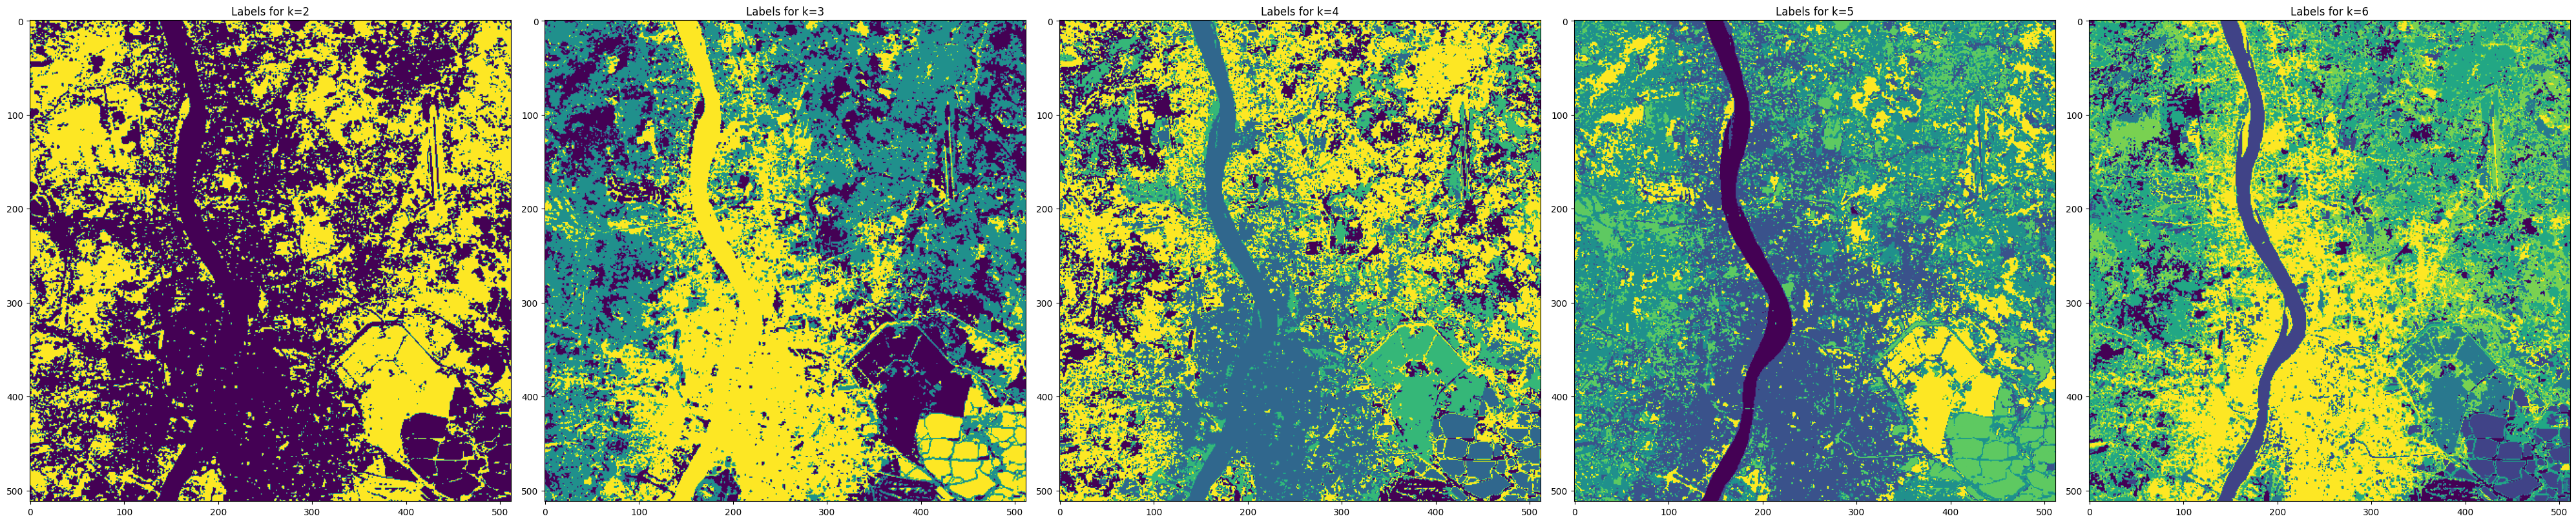

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Set a seed value for reproducibility
np.random.seed(13)

# Assuming you have five label matrices stored in a dictionary called reshaped_labels

# Define the colormap
cmap = 'viridis'

# Create a figure with 1x5 subplots
fig, axes = plt.subplots(1, 5, figsize=(40, 10))

# Plot each label matrix
for i, labels in enumerate(reshaped_labels.values()):
    axes[i].imshow(labels, cmap=cmap)
    axes[i].set_title(f"Labels for k={list(reshaped_labels.keys())[i]}")

# Adjust layout
plt.tight_layout()
plt.show()
